In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Coal

In [2]:
coal_1960 = pd.read_csv('../data/merged/coal/1960s_coal.csv')
coal_1970 = pd.read_csv('../data/merged/coal/1970s_coal.csv')
coal_1980 = pd.read_csv('../data/merged/coal/1980s_coal.csv')
coal_1990 = pd.read_csv('../data/merged/coal/1990s_coal.csv')

In [3]:
print('1960, coal', coal_1960.shape)
print('1970, coal', coal_1970.shape)
print('1980, coal', coal_1980.shape)
print('1990, coal', coal_1990.shape)

1960, coal (253, 9)
1970, coal (347, 11)
1980, coal (358, 11)
1990, coal (337, 11)


In [4]:
coal_1960['decade'] = 1960
coal_1970['decade'] = 1970
coal_1980['decade'] = 1980
coal_1990['decade'] = 1990


coal_df = pd.concat([coal_1960, coal_1970, coal_1980, coal_1990], ignore_index=True)
mapping = {0: -1, 1: 0, 2: 1}
coal_df['final_label'] = coal_df['final_label'].map(mapping)


coal_df.reset_index(drop=True, inplace=True)

In [5]:
coal_df = coal_df.dropna(subset=['date'])
coal_df['date'] = coal_df['date'].astype(str)
coal_df['date'] = pd.to_datetime(coal_df['date'], errors='coerce')
coal_df['year'] = coal_df['date'].dt.year

In [6]:
coal_df.shape

(1289, 15)

In [7]:
coal_df = coal_df.dropna(subset=['final_label'])
coal_df.shape

(953, 15)

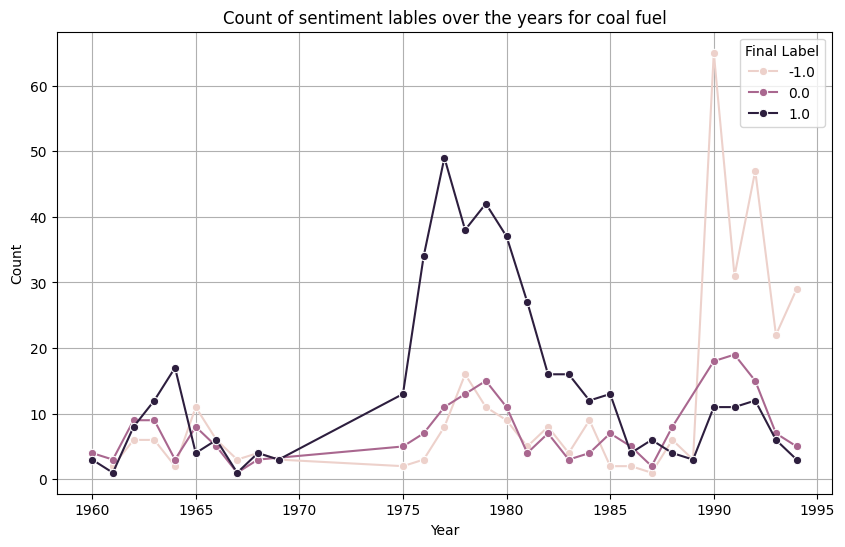

In [8]:
coal_df.loc[:, 'year'] = pd.Categorical(coal_df['year'])

label_counts = coal_df.groupby(['year', 'final_label'], observed=False).size().reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.lineplot(data=label_counts, x='year', y='count', hue='final_label', marker='o')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of sentiment lables over the years for coal fuel')
plt.legend(title='Final Label')
plt.grid(True)

# Show the plot
plt.show()

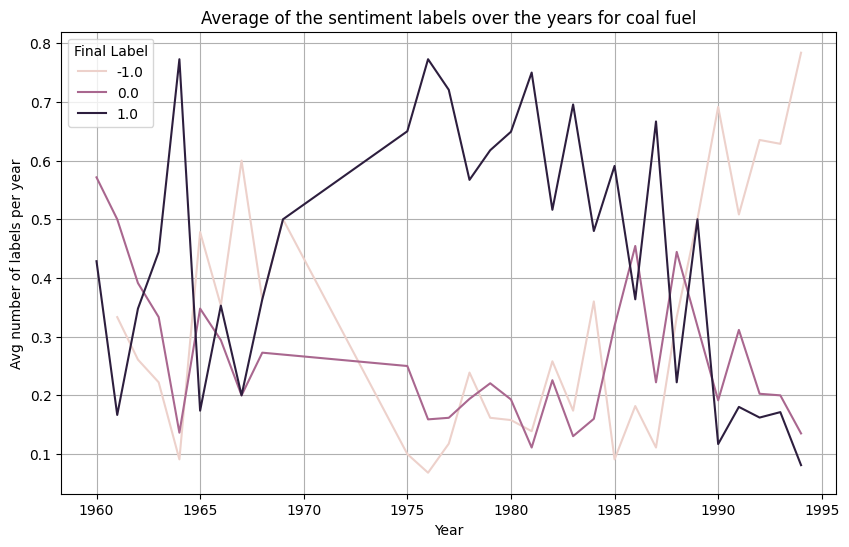

In [9]:
coal_df.loc[:, 'year'] = pd.Categorical(coal_df['year'])

counts = coal_df.groupby(['year', 'final_label'], observed=False).size().reset_index(name='count')
total_counts = coal_df.groupby(['year'], observed=True).size().reset_index(name='total_count')
merged = counts.merge(total_counts, on=['year'])
merged['proportion'] = merged['count'] / merged['total_count']


plt.figure(figsize=(10, 6))
# sns.lineplot(data=proportion, x='year', y='count', hue='final_label', marker='o')
sns.lineplot(data=merged, x='year', y='proportion', hue='final_label', markers=True, dashes=False)


plt.xlabel('Year')
plt.ylabel('Avg number of labels per year')
plt.title('Average of the sentiment labels over the years for coal fuel')
plt.legend(title='Final Label')
plt.grid(True)

# Show the plot
plt.show()

## Gas

In [10]:
gas_1960 = pd.read_csv('../data/merged/gas/1960s_gas.csv')
gas_1970 = pd.read_csv('../data/merged/gas/1970s_gas.csv')
gas_1980 = pd.read_csv('../data/merged/gas/1980s_gas.csv')
gas_1990 = pd.read_csv('../data/merged/gas/1990s_gas.csv')

In [11]:
print('1960, gas', gas_1960.shape)
print('1970, gas', gas_1970.shape)
print('1980, gas', gas_1980.shape)
print('1990, gas', gas_1990.shape)

1960, gas (416, 9)
1970, gas (294, 11)
1980, gas (540, 11)
1990, gas (356, 11)


In [12]:
gas_1960['decade'] = 1960
gas_1970['decade'] = 1970
gas_1980['decade'] = 1980
gas_1990['decade'] = 1990


gas_df = pd.concat([gas_1960, gas_1970, gas_1980, gas_1990], ignore_index=True)
mapping = {0: -1, 1: 0, 2: 1}
gas_df['final_label'] = gas_df['final_label'].map(mapping)

gas_df.reset_index(drop=True, inplace=True)

In [13]:
gas_df.shape

(1606, 14)

In [14]:
gas_df = gas_df.dropna(subset=['date'])
gas_df['date'] = gas_df['date'].astype(str)
gas_df['date'] = pd.to_datetime(gas_df['date'], errors='coerce')
gas_df['year'] = gas_df['date'].dt.year

In [15]:
gas_df = gas_df.dropna(subset=['final_label'])
gas_df.shape

(1058, 15)

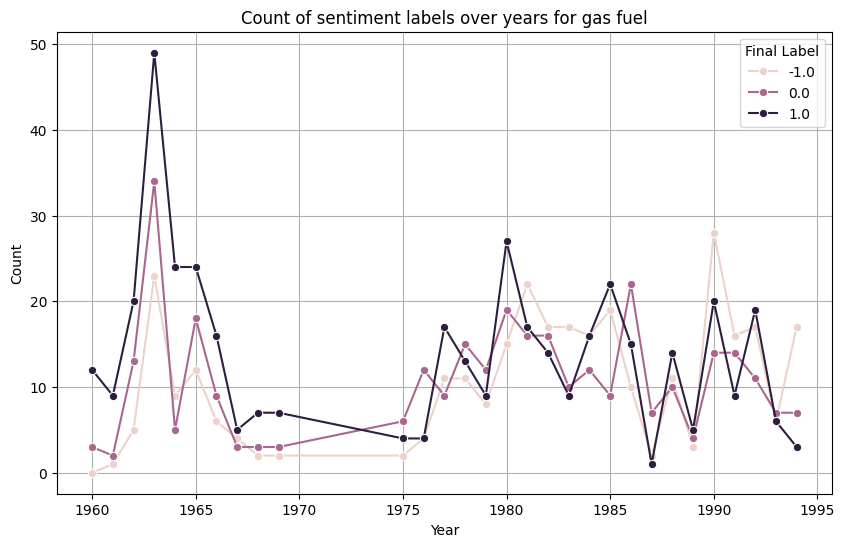

In [16]:
gas_df['year'] = pd.Categorical(gas_df['year'])

# Group by 'year' and 'final_label'
label_counts = gas_df.groupby(['year', 'final_label'], observed=False).size().reset_index(name='count')

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=label_counts, x='year', y='count', hue='final_label', marker='o')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of sentiment labels over years for gas fuel')
plt.legend(title='Final Label')
plt.grid(True)

# Format x-axis to display integer years only
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))

# Show the plot
plt.show()

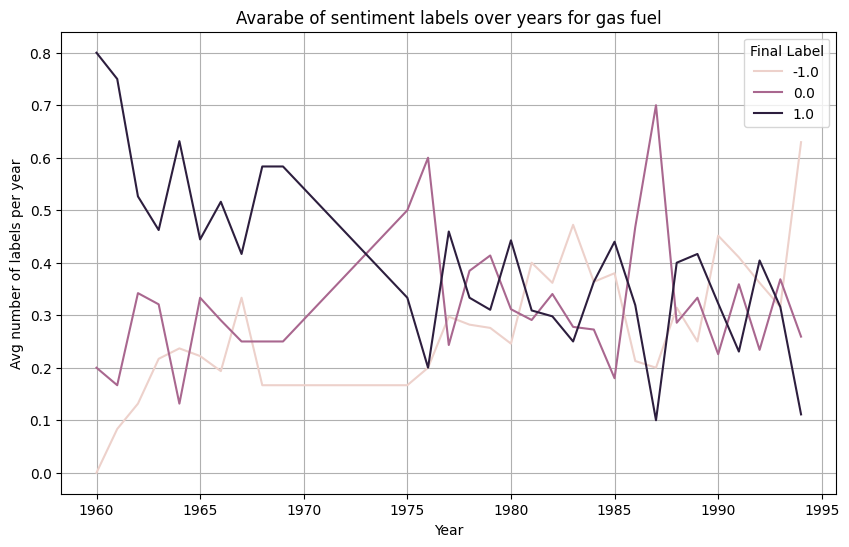

In [17]:
gas_df['year'] = pd.Categorical(gas_df['year'])

counts = gas_df.groupby(['year', 'final_label'], observed=False).size().reset_index(name='count')
total_counts = gas_df.groupby(['year'], observed=True).size().reset_index(name='total_count')
merged = counts.merge(total_counts, on=['year'])
merged['proportion'] = merged['count'] / merged['total_count']


plt.figure(figsize=(10, 6))
# sns.lineplot(data=proportion, x='year', y='count', hue='final_label', marker='o')
sns.lineplot(data=merged, x='year', y='proportion', hue='final_label', markers=True, dashes=False)


plt.xlabel('Year')
plt.ylabel('Avg number of labels per year')
plt.title('Avarabe of sentiment labels over years for gas fuel')
plt.legend(title='Final Label')
plt.grid(True)

# Show the plot
plt.show()

## Oil

In [18]:
oil_1960 = pd.read_csv('../data/merged/oil/1960s_oil.csv')
oil_1970 = pd.read_csv('../data/merged/oil/1970s_oil.csv')
oil_1980 = pd.read_csv('../data/merged/oil/1980s_oil.csv')
oil_1990 = pd.read_csv('../data/merged/oil/1990s_oil.csv')

In [19]:
print('1960, oil', oil_1960.shape)
print('1970, oil', oil_1970.shape)
print('1980, oil', oil_1980.shape)
print('1990, oil', oil_1990.shape)

1960, oil (393, 9)
1970, oil (458, 11)
1980, oil (537, 11)
1990, oil (228, 11)


In [20]:
oil_1960['decade'] = 1960
oil_1970['decade'] = 1970
oil_1980['decade'] = 1980
oil_1990['decade'] = 1990


oil_df = pd.concat([oil_1960, oil_1970, oil_1980, oil_1990], ignore_index=True)
mapping = {0: -1, 1: 0, 2: 1}
oil_df['final_label'] = oil_df['final_label'].map(mapping)

oil_df.reset_index(drop=True, inplace=True)

In [21]:
oil_df.shape

(1616, 14)

In [22]:
oil_df = oil_df.dropna(subset=['date'])
oil_df['date'] = oil_df['date'].astype(str)
oil_df['date'] = pd.to_datetime(oil_df['date'], errors='coerce')
oil_df['year'] = oil_df['date'].dt.year

In [23]:
oil_df = oil_df.dropna(subset=['final_label'])
oil_df.shape

(1130, 15)

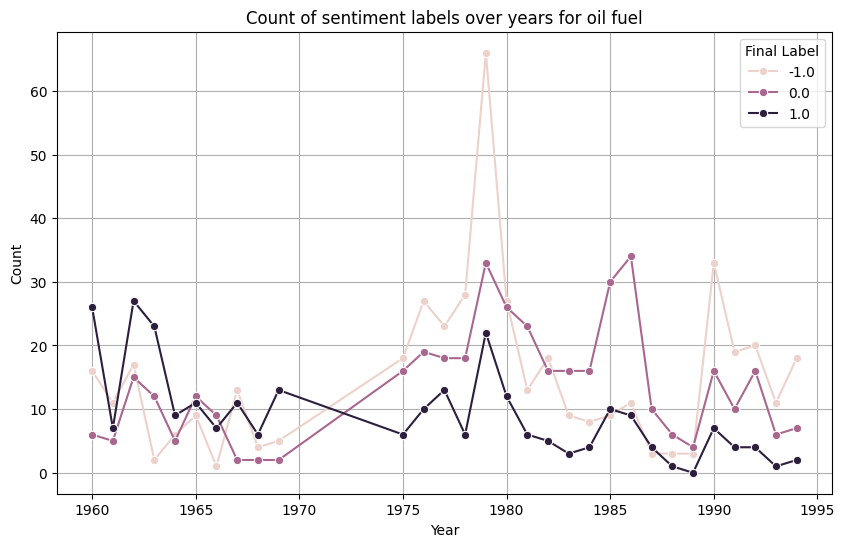

In [24]:
oil_df['year'] = pd.Categorical(oil_df['year'])

# Group by 'year' and 'final_label'
label_counts = oil_df.groupby(['year', 'final_label'], observed=False).size().reset_index(name='count')

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=label_counts, x='year', y='count', hue='final_label', marker='o')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of sentiment labels over years for oil fuel')
plt.legend(title='Final Label')
plt.grid(True)

# Format x-axis to display integer years only
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))

# Show the plot
plt.show()

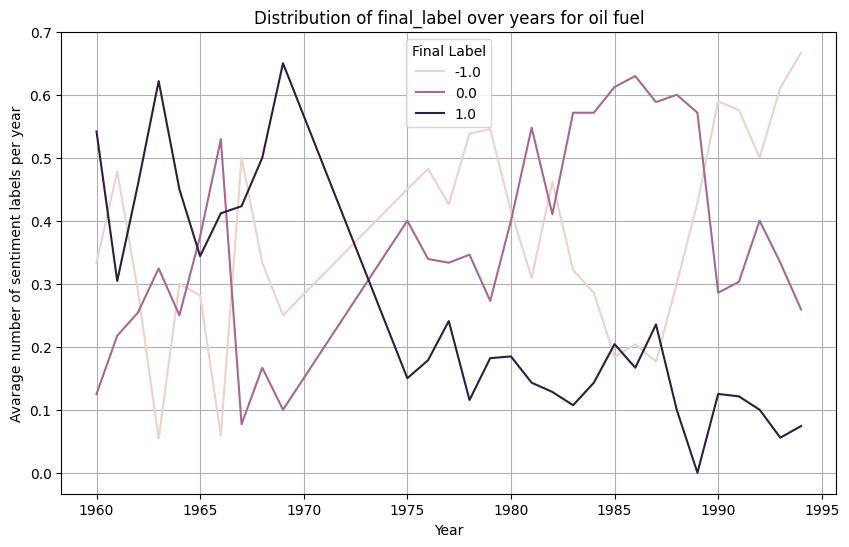

In [25]:
oil_df['year'] = pd.Categorical(oil_df['year'])

counts = oil_df.groupby(['year', 'final_label'], observed=False).size().reset_index(name='count')
total_counts = oil_df.groupby(['year'], observed=True).size().reset_index(name='total_count')
merged = counts.merge(total_counts, on=['year'])
merged['proportion'] = merged['count'] / merged['total_count']


plt.figure(figsize=(10, 6))
# sns.lineplot(data=proportion, x='year', y='count', hue='final_label', marker='o')
sns.lineplot(data=merged, x='year', y='proportion', hue='final_label', markers=True, dashes=False)


plt.xlabel('Year')
plt.ylabel('Avarage number of sentiment labels per year')
plt.title('Distribution of final_label over years for oil fuel')
plt.legend(title='Final Label')
plt.grid(True)

# Show the plot
plt.show()

## All in one plot

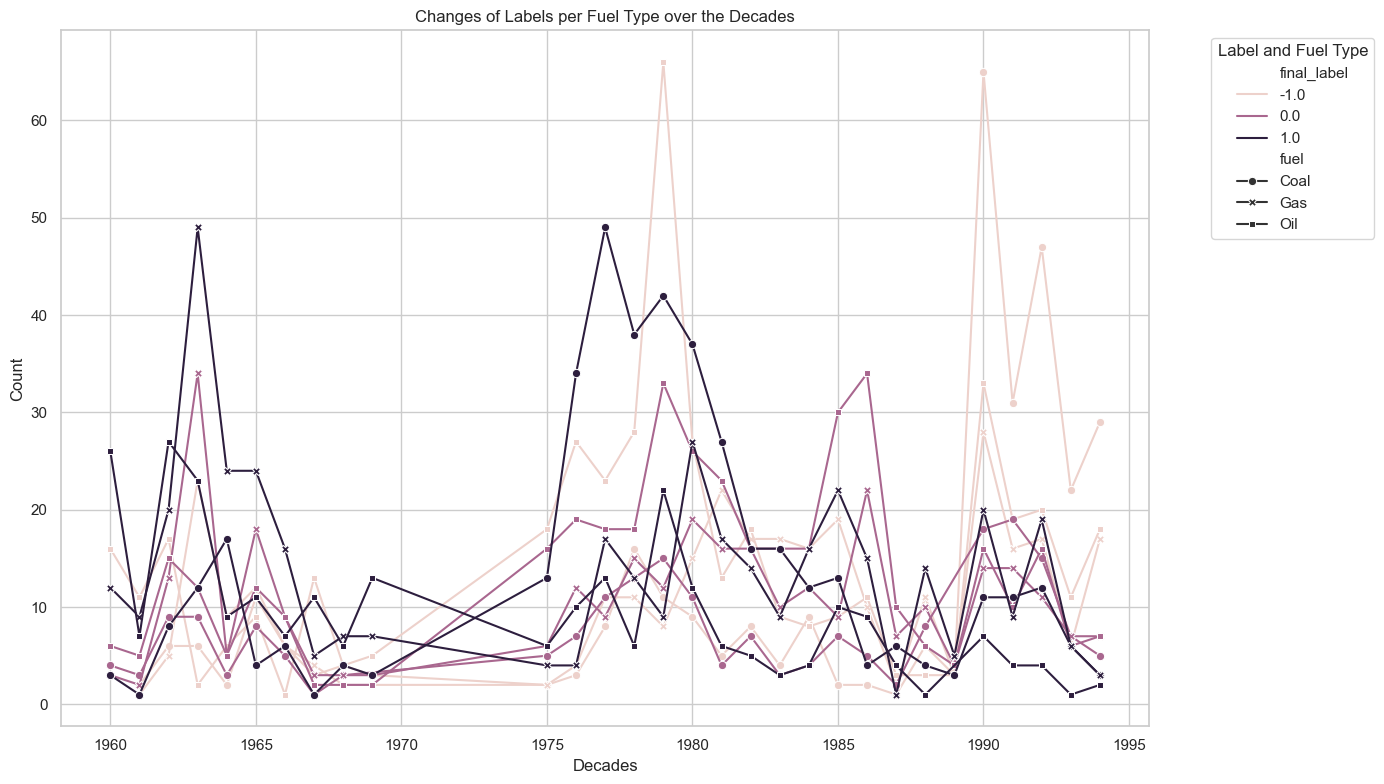

In [26]:
oil_df['fuel'] = 'Oil'
gas_df['fuel'] = 'Gas'
coal_df['fuel'] = 'Coal'

combined_df = pd.concat([oil_df, gas_df, coal_df])


grouped = combined_df.groupby(['year', 'fuel', 'final_label'], observed=True).size().reset_index(name='count')


# Set up the plotting area
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Plot the data
sns.lineplot(data=grouped, x='year', y='count', hue='final_label', style='fuel', markers=True, dashes=False)

# Add titles and labels
plt.title('Changes of Labels per Fuel Type over the Decades')
plt.xlabel('Decades')
plt.ylabel('Count')
plt.legend(title='Label and Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

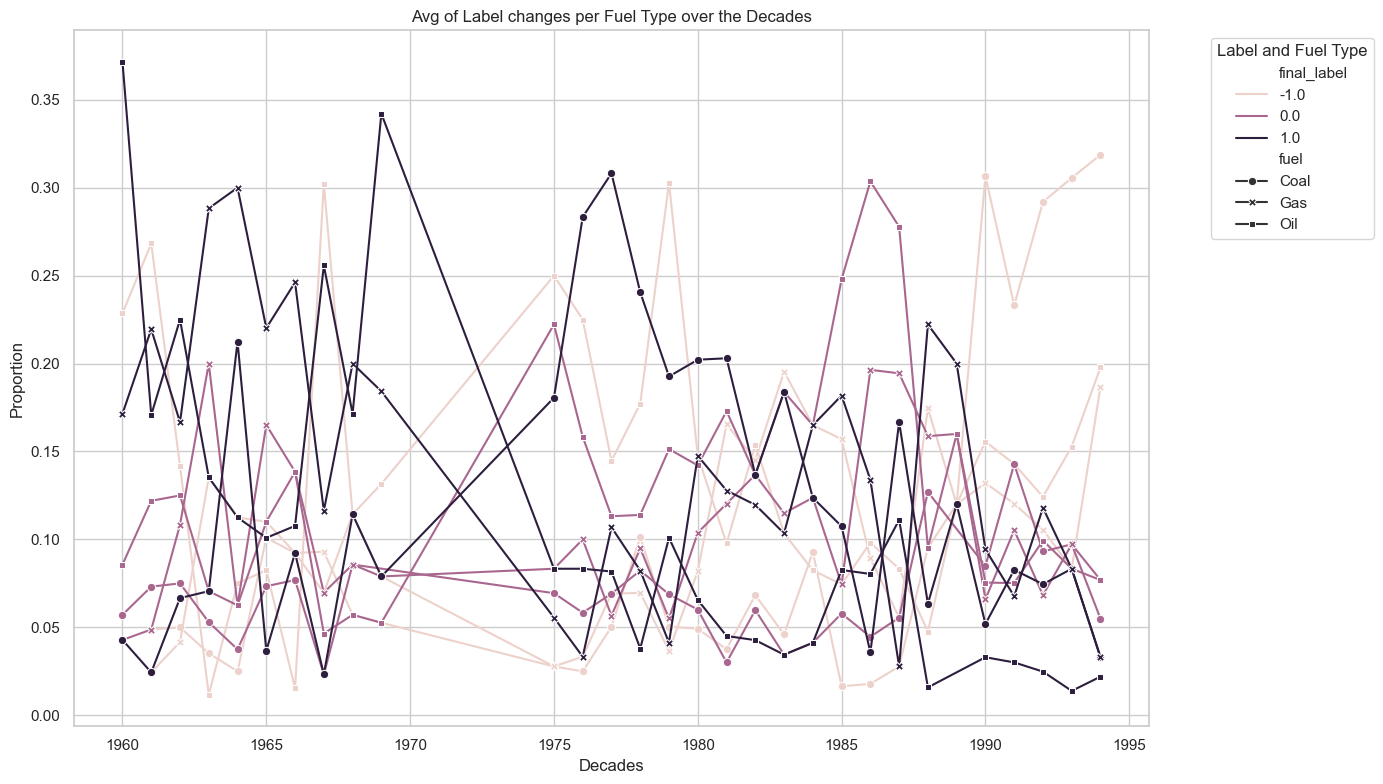

In [27]:
oil_df['fuel'] = 'Oil'
gas_df['fuel'] = 'Gas'
coal_df['fuel'] = 'Coal'

combined_df = pd.concat([oil_df, gas_df, coal_df])

counts = combined_df.groupby(['year', 'fuel', 'final_label'], observed=True).size().reset_index(name='count')
total_counts = combined_df.groupby(['year'], observed=True).size().reset_index(name='total_count')
merged = counts.merge(total_counts, on=['year'])
merged['proportion'] = merged['count'] / merged['total_count']


# Set up the plotting area
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Plot the data
sns.lineplot(data=merged, x='year', y='proportion', hue='final_label', style='fuel', markers=True, dashes=False)

# Add titles and labels
plt.title('Avg of Label changes per Fuel Type over the Decades')
plt.xlabel('Decades')
plt.ylabel('Proportion')
plt.legend(title='Label and Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

## Negative sentiment

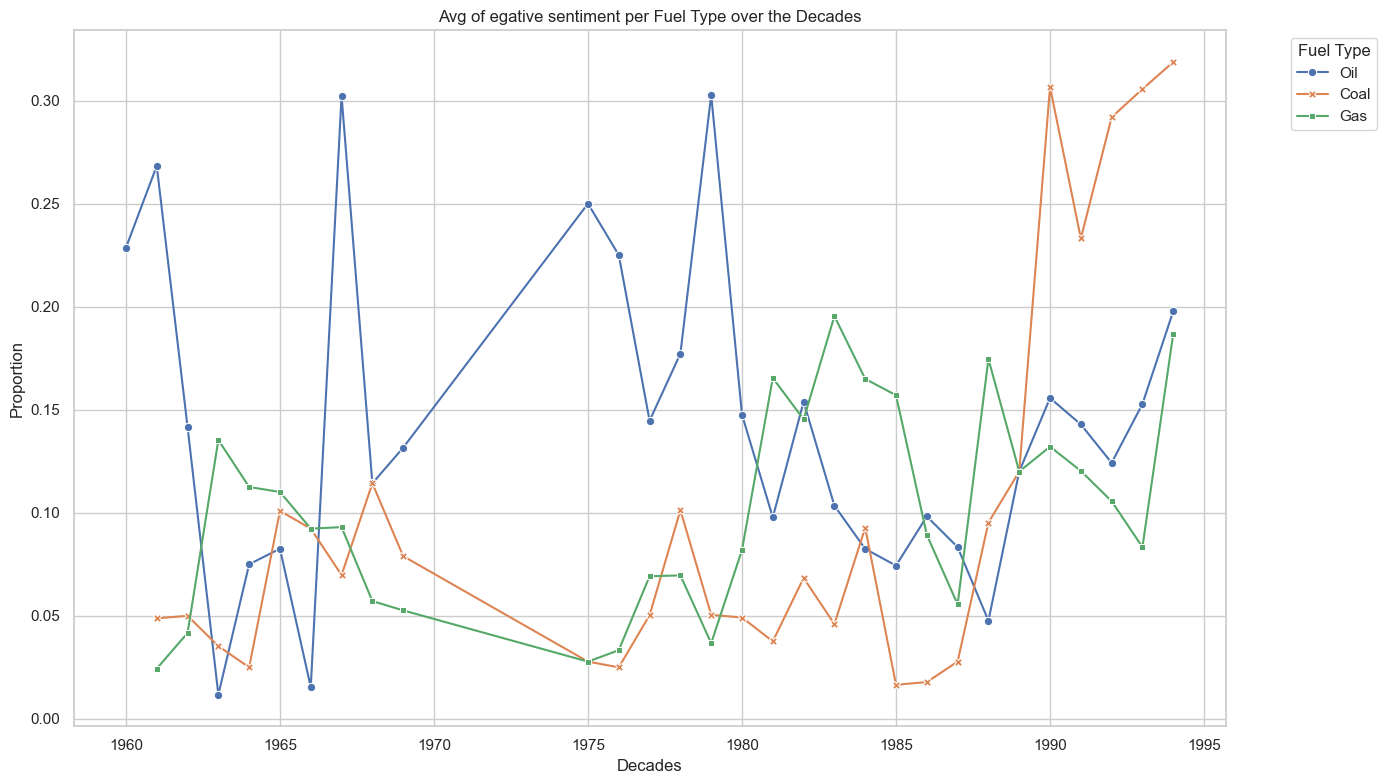

In [28]:
label_1_df = merged[merged['final_label'] == -1]

# Set up the plotting area
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Plot the data for label 1 only
sns.lineplot(data=label_1_df, x='year', y='proportion', hue='fuel', style='fuel', markers=True, dashes=False)

# Add titles and labels
plt.title('Avg of egative sentiment per Fuel Type over the Decades')
plt.xlabel('Decades')
plt.ylabel('Proportion')

plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

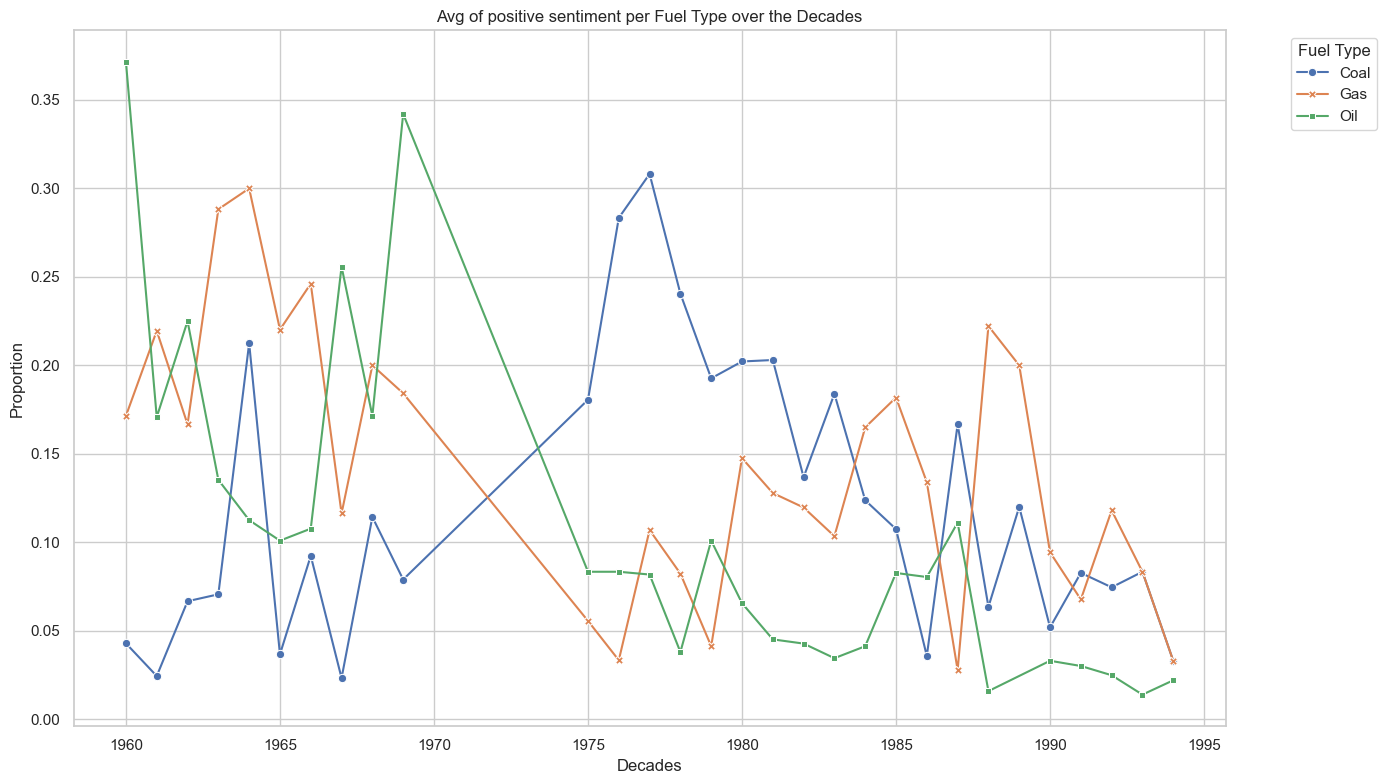

In [29]:
label_1_df = merged[merged['final_label'] == 1]

# Set up the plotting area
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Plot the data for label 1 only
sns.lineplot(data=label_1_df, x='year', y='proportion', hue='fuel', style='fuel', markers=True, dashes=False)

# Add titles and labels
plt.title('Avg of positive sentiment per Fuel Type over the Decades')
plt.xlabel('Decades')
plt.ylabel('Proportion')

plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

In [30]:
combined_df = pd.concat([oil_df, gas_df, coal_df])

In [31]:
combined_df

,unique_id_merge2,unique_id_maud,date,newspaper_publisher,newspaper_title,text,labels_merge2,labels_maud,final_label,decade,unique_id_edo,unique_id_marin,labels_edo,labels_marin,year,fuel
0,1.0,1.0,1968-10-21,N.V. Drukkerĳ De Tĳd,De tĳd : dagblad voor Nederland,Om de kolen uit de mijnen bij de verbruiker te...,2.0,2.0,1.0,1960,NaN,NaN,NaN,NaN,1968,Oil
1,2.0,2.0,1965-04-24,De Arbeiderspers,Het vrĳe volk : democratisch-socialistisch dag...,kolen willen de centrales niet. Olie is ten sl...,1.0,1.0,0.0,1960,NaN,NaN,NaN,NaN,1965,Oil
2,3.0,3.0,1963-02-23,N.V. Drukkerĳ De Tĳd,De Tijd De Maasbode,de ballpoint waarmee ik deze woorden neerschrf...,2.0,2.0,1.0,1960,NaN,NaN,NaN,NaN,1963,Oil
3,4.0,4.0,1965-01-13,s.n.,De waarheid,Naar aanleiding van de brief van de Algemene B...,0.0,0.0,-1.0,1960,NaN,NaN,NaN,NaN,1965,Oil
5,6.0,6.0,1967-03-02,Stichting Je Maintiendrai-Friesland,Friese koerier : onafhankelĳk dagblad voor Fri...,Opmerkelijk is ook de voortdurende politieke s...,0.0,0.0,-1.0,1960,NaN,NaN,NaN,NaN,1967,Oil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,NaN,NaN,1991-05-21,Stichting Nederlands Dagblad,Nederlands dagblad : gereformeerd gezinsblad /...,kasgassen' in de atmosfeer zal de komende jare...,NaN,NaN,-1.0,1990,328.0,131.0,0.0,0.0,1991,Coal
1286,NaN,NaN,1991-04-17,Nieuwenhuis,Nieuwsblad van het Noorden,"""We gaan geen acties voeren of bezwaren indien...",NaN,NaN,-1.0,1990,329.0,157.0,0.0,0.0,1991,Coal
1287,NaN,85.0,1990-12-15,Nieuwe Limburger koerier;Uitgeversmaatschappĳ ...,Limburgsch dagblad,Uit allerlei wetenschappelijke onderzoeken is ...,NaN,1.0,0.0,1990,330.0,168.0,1.0,0.0,1990,Coal
1288,NaN,NaN,1993-11-16,Dagblad De Telegraaf,De Telegraaf,•~~ Het dossier wijst er overigens op dat kern...,NaN,NaN,-1.0,1990,331.0,128.0,0.0,0.0,1993,Coal


In [32]:
combined_df['final_label'] = combined_df['final_label'].astype(int)
combined_df

,unique_id_merge2,unique_id_maud,date,newspaper_publisher,newspaper_title,text,labels_merge2,labels_maud,final_label,decade,unique_id_edo,unique_id_marin,labels_edo,labels_marin,year,fuel
0,1.0,1.0,1968-10-21,N.V. Drukkerĳ De Tĳd,De tĳd : dagblad voor Nederland,Om de kolen uit de mijnen bij de verbruiker te...,2.0,2.0,1,1960,NaN,NaN,NaN,NaN,1968,Oil
1,2.0,2.0,1965-04-24,De Arbeiderspers,Het vrĳe volk : democratisch-socialistisch dag...,kolen willen de centrales niet. Olie is ten sl...,1.0,1.0,0,1960,NaN,NaN,NaN,NaN,1965,Oil
2,3.0,3.0,1963-02-23,N.V. Drukkerĳ De Tĳd,De Tijd De Maasbode,de ballpoint waarmee ik deze woorden neerschrf...,2.0,2.0,1,1960,NaN,NaN,NaN,NaN,1963,Oil
3,4.0,4.0,1965-01-13,s.n.,De waarheid,Naar aanleiding van de brief van de Algemene B...,0.0,0.0,-1,1960,NaN,NaN,NaN,NaN,1965,Oil
5,6.0,6.0,1967-03-02,Stichting Je Maintiendrai-Friesland,Friese koerier : onafhankelĳk dagblad voor Fri...,Opmerkelijk is ook de voortdurende politieke s...,0.0,0.0,-1,1960,NaN,NaN,NaN,NaN,1967,Oil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,NaN,NaN,1991-05-21,Stichting Nederlands Dagblad,Nederlands dagblad : gereformeerd gezinsblad /...,kasgassen' in de atmosfeer zal de komende jare...,NaN,NaN,-1,1990,328.0,131.0,0.0,0.0,1991,Coal
1286,NaN,NaN,1991-04-17,Nieuwenhuis,Nieuwsblad van het Noorden,"""We gaan geen acties voeren of bezwaren indien...",NaN,NaN,-1,1990,329.0,157.0,0.0,0.0,1991,Coal
1287,NaN,85.0,1990-12-15,Nieuwe Limburger koerier;Uitgeversmaatschappĳ ...,Limburgsch dagblad,Uit allerlei wetenschappelijke onderzoeken is ...,NaN,1.0,0,1990,330.0,168.0,1.0,0.0,1990,Coal
1288,NaN,NaN,1993-11-16,Dagblad De Telegraaf,De Telegraaf,•~~ Het dossier wijst er overigens op dat kern...,NaN,NaN,-1,1990,331.0,128.0,0.0,0.0,1993,Coal


In [34]:
combined_df.to_csv('../data/merged/combined_df.csv', index=False)